In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scienceplots
plt.style.use(['bmh','science','notebook','grid'])

In [2]:
# loading all packages
imp_30hz = np.load('J:/Universidade/GIECAR/Data/impedance_30hz.npy')
imp_background = np.load('J:/Universidade/GIECAR/Data/impedance_background.npy')
inverted_impedance_final_butter = np.load('J:/Universidade/GIECAR/Data/inverted_impedance_butter.npy')
inverted_impedance_final_ricker = np.load('J:/Universidade/GIECAR/Data/inverted_impedance_ricker.npy')
residuo_ricker = np.load('J:/Universidade/GIECAR/Data/residuo_ricker.npy')
residuo_butter = np.load('J:/Universidade/GIECAR/Data/residuo_butter.npy')


Colors

In [3]:
PRIMARY = "royalblue"
SECONDARY = "forestgreen"
TERCIARY = "firebrick"
ALTERNATIVE = "darkorange"
TEXT_COLOR = '#212121'
plt.rc('font', family='Arial')

In [6]:
ricker_inv = inverted_impedance_final_ricker
butter_inv = inverted_impedance_final_butter

nx, ny, nz = imp_30hz.shape

### MAPE

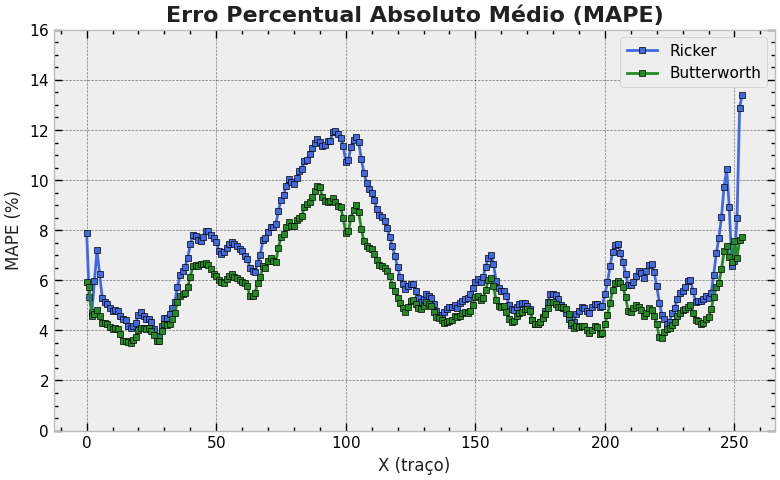

In [96]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE

mape_ricker = np.zeros(nx)
mape_butter = np.zeros(nx)

for ix in range(nx):
    mape_ricker[ix] = MAPE(imp_30hz[ix,128,:], ricker_inv[ix,128,:]) * 100
    mape_butter[ix] = MAPE(imp_30hz[ix,128,:], butter_inv[ix,128,:]) * 100

mape_ricker = np.delete(mape_ricker, slice(0, 2))
mape_butter = np.delete(mape_butter, slice(0, 2))


plt.figure(figsize=(8, 5))
plt.plot(mape_ricker, 's-', label='Ricker', ms=5,
         color=PRIMARY, markeredgecolor='black', markeredgewidth=0.5)

plt.plot(mape_butter, 's-', label='Butterworth', ms=5,
         color=SECONDARY, markeredgecolor='black', markeredgewidth=0.5)

plt.title('Erro Percentual Absoluto Médio (MAPE)', fontsize=16, fontweight='bold', color=TEXT_COLOR)
plt.xlabel('X (traço)', fontsize=12, color=TEXT_COLOR)
plt.ylabel('MAPE (%)', fontsize=12, color=TEXT_COLOR)
plt.tick_params(axis='both', labelsize=11)
plt.legend(loc='upper right', fontsize=11)
plt.ylim(0, 16)


plt.tight_layout()
plt.savefig('simposio_figs/mape.png', dpi=300, bbox_inches='tight')
plt.show()

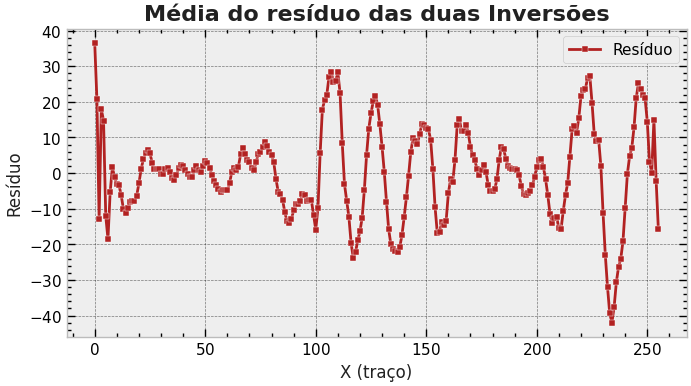

In [68]:
residuo = inverted_impedance_final_ricker - inverted_impedance_final_butter
residuo_trace = np.zeros(nx)

for ix in range(nx):
    residuo_trace[ix] = np.mean(residuo[ix,128,:])
    
plt.figure(figsize=(8, 4))    

plt.plot(residuo_trace,'s-', label='Resíduo', ms=5,
         color=TERCIARY, markeredgecolor='white', markeredgewidth=0.3)

plt.title('Média do resíduo das duas Inversões', fontsize=16, 
          fontweight='bold', color=TEXT_COLOR)
plt.xlabel('X (traço)', fontsize=12, color=TEXT_COLOR)
plt.ylabel('Resíduo', fontsize=12, color=TEXT_COLOR)
plt.tick_params(axis='both', labelsize=11)
plt.legend(loc='upper right', fontsize=11)

plt.savefig('simposio_figs/residuo_inversoes.png', dpi=300, bbox_inches='tight')
plt.show()

In [85]:
xxx = np.arange(0,254,1)

In [86]:
MAPE_b = np.delete(mape_butter, slice(0, 2))
MAPE_r = np.delete(mape_ricker, slice(0, 2))

In [87]:
print(f"A média do MAPE de Ricker é: {np.mean(MAPE_r):.2f}%")
print(f"A média do MAPE de Butterworth é: {np.mean(MAPE_b):.2f}%")

A média do MAPE de Ricker é: 6.67%
A média do MAPE de Butterworth é: 5.58%


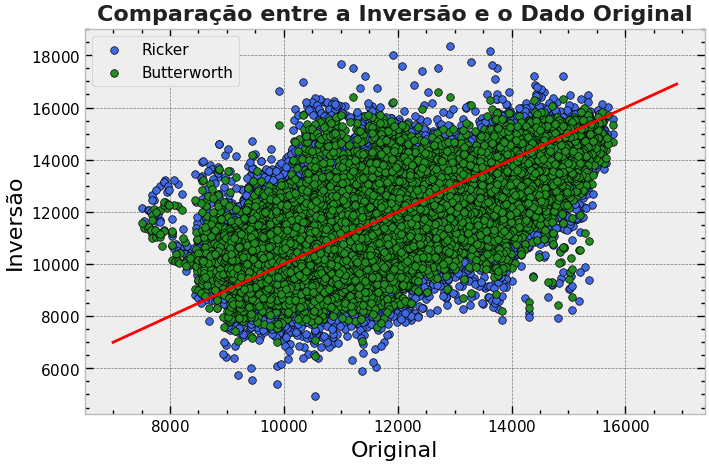

In [184]:
# iterar sobre o primeiro :, que é o x, x,y,z
x = np.arange(7000, 17000, 100)

plt.figure(figsize=(8, 5))

plt.scatter(imp_30hz[:,128,:].T,
            inverted_impedance_final_ricker[:,128,:].T,
            s=30,
            color=PRIMARY,
            label='Ricker',
            edgecolors='black',
            linewidth=0.5)
plt.scatter(imp_30hz[:,128,:].T,
            inverted_impedance_final_butter[:,128,:].T,
            s=30,
            label='Butterworth',
            color=SECONDARY,
            edgecolors='black',
            linewidth=0.5)

plt.title("Comparação entre a Inversão e o Dado Original", fontsize=16, fontweight='bold', color=TEXT_COLOR)
plt.ylabel('Inversão')
plt.xlabel('Original')
plt.plot(x,x, color="red")
plt.tick_params(axis='both', labelsize=11)
plt.legend(loc='upper left', fontsize=11)
plt.savefig('simposio_figs/inversaoxoriginal.png', dpi=300, bbox_inches='tight')
plt.show()
# abaixo da reta subestimando os valores de impedancia
# acima da reta superestimando os valores de impedancia

In [251]:
from scipy import stats
# 32, 64, 128, 196, 256
values = np.arange(0,254,8)

#section = 254
correlation_residuo_rb = np.zeros(len(values))
correlation_or = np.zeros(len(values))
correlation_ob = np.zeros(len(values))
correlation_rb = np.zeros(len(values))

for i, value in enumerate(values):
    correlation_residuo_rb[i] = stats.pearsonr(
        residuo_ricker[:,value,:].flatten(),
        residuo_butter[:,value,:].flatten()
    )[0]

    correlation_or[i] = stats.pearsonr(
        imp_30hz[:,value,:].flatten(),
        inverted_impedance_final_ricker[:,value,:].flatten()
    )[0]

    correlation_ob[i] = stats.pearsonr(
        imp_30hz[:,value,:].flatten(),
        inverted_impedance_final_butter[:,value,:].flatten()
    )[0]

    correlation_rb[i] = stats.pearsonr(
        inverted_impedance_final_ricker[:,value,:].flatten(),
        inverted_impedance_final_butter[:,value,:].flatten()
    )[0]


print(f'A correlação de Pearson entre os resíduos é: {np.mean(correlation_residuo_rb):.2f}')
print(f'A correlação de Pearson entre o original e a inversão de Ricker é: {np.mean(correlation_or):.2f}')
print(f'A correlação de Pearson entre o original e a inversão de Butterworth é: {np.mean(correlation_ob):.2f}')
print(f'A correlação de Pearson entre as inversões de Ricker e Butterworth é: {np.mean(correlation_rb):.2f}')

A correlação de Pearson entre os resíduos é: 0.97
A correlação de Pearson entre o original e a inversão de Ricker é: 0.65
A correlação de Pearson entre o original e a inversão de Butterworth é: 0.73
A correlação de Pearson entre as inversões de Ricker e Butterworth é: 0.97


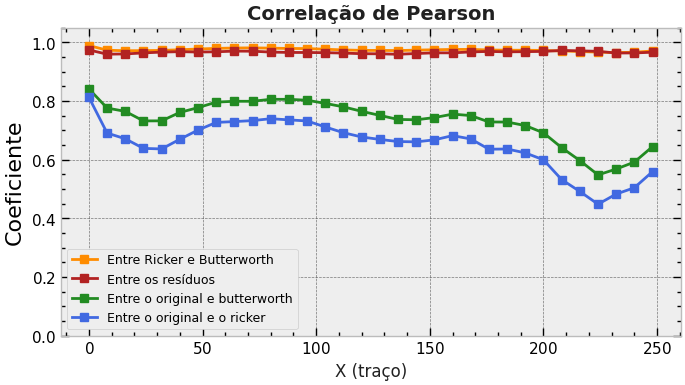

In [268]:
plt.figure(figsize=(8,4))

plt.plot(values, 
        correlation_rb,
        's-',
        label="Entre Ricker e Butterworth",
        color=ALTERNATIVE)
plt.plot(values,
        correlation_residuo_rb,
        's-',
        label="Entre os resíduos",
        color=TERCIARY)
plt.plot(values, 
        correlation_ob,
        's-', 
        label="Entre o original e butterworth",
        color=SECONDARY)
plt.plot(values, 
        correlation_or,
        's-', 
        label="Entre o original e o ricker",
        color=PRIMARY)

plt.title("Correlação de Pearson", fontsize=14, 
          fontweight='bold', color=TEXT_COLOR)


plt.legend(loc="lower left", fontsize=9)
plt.ylim(0,1.05)
plt.tick_params(axis='both', labelsize=11)
plt.ylabel("Coeficiente")
plt.xlabel('X (traço)', fontsize=12, color=TEXT_COLOR)

plt.savefig('simposio_figs/correlacao_pearson.png', dpi=300, bbox_inches='tight')
plt.show()

In [179]:
len(residuo_ricker[:,:,:].flatten())

16777216

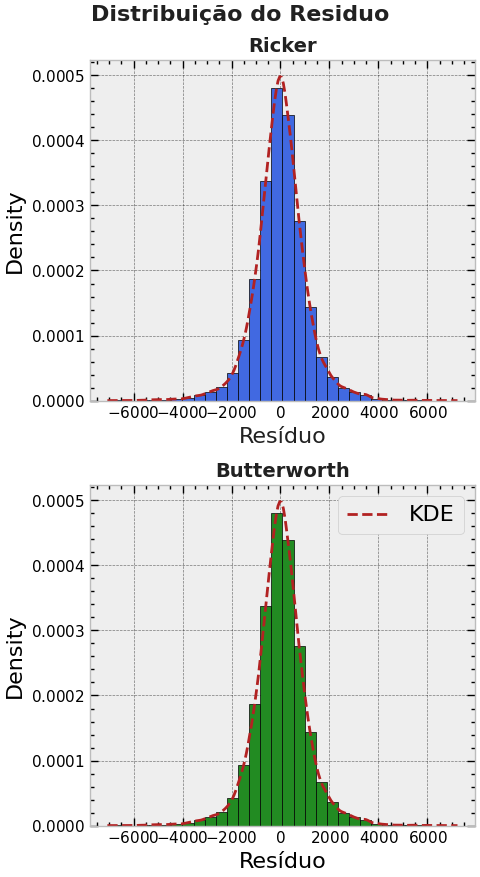

In [270]:
import seaborn as sns

# plt.figure(figsize=(6,5))
fig, axs = plt.subplots(2, 1, sharey=True, figsize=(5, 9))

# Flatten the 3D array to 1D
residuo_flat_ricker = residuo_ricker[:,128,:].flatten()
residuo_flat_butter = residuo_ricker[:,128,:].flatten()

# Create a histogram for ricker
axs[0].hist(residuo_flat_ricker,
         bins=30,
         density=True,
         edgecolor='black',
         color=PRIMARY)
axs[0].tick_params(axis='both', labelsize=11)
axs[0].set_title('Ricker', fontsize=14, fontweight='bold', color=TEXT_COLOR	)
axs[0].set_xlabel('Resíduo',color=TEXT_COLOR)

# Create a KDE plot for ricker
sns.kdeplot(residuo_flat_ricker,
            color=TERCIARY,
            linewidth=2,
            linestyle='--',
            label='KDE',
            ax=axs[0])  # Pass the second subplot axes

# Create a histogram for butter
axs[1].hist(residuo_flat_butter,
         bins=30,
         density=True,
         edgecolor='black',
         color=SECONDARY)
axs[1].set_title('Butterworth', fontsize=14, fontweight='bold', color=TEXT_COLOR)
axs[1].tick_params(axis='both', labelsize=11)
axs[1].set_xlabel('Resíduo')

# Create a KDE plot for butter
sns.kdeplot(
    residuo_flat_butter,
    color=TERCIARY,
    linewidth=2,
    linestyle='--',
    label='KDE',
    ax=axs[1]
    )


plt.suptitle('Distribuição do Residuo', fontsize=16, fontweight='bold', color=TEXT_COLOR)

plt.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.savefig('simposio_figs/distribuicao_residuo.png', dpi=500, bbox_inches='tight')
plt.show()